## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [4]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [269]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


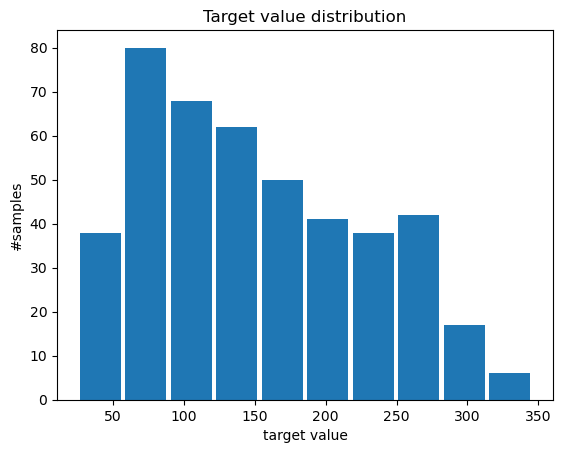

In [270]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [271]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [272]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [273]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
e_reg = reg.score(X_test, y_test)
np.round(e_reg,3)

0.477

**Interpret feature coefficients and intercept**

In [274]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [275]:
np.round(reg.intercept_,3)

151.008

**[Group activity]: explore other parameters/attributes/methods**

In [276]:
reg._estimator_type

'regressor'

In [277]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [278]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [279]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [280]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [281]:
np.round(rg_reg.intercept_,3)

151.867

### Fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [282]:
ls_reg = Lasso()
ls_reg.fit(X_train, y_train)
ls_reg_score = ls_reg.score(X_test, y_test)
np.round(ls_reg_score, 3)

0.362

**Interpret feature coefficients and intercept**

In [283]:
np.round(ls_reg.coef_, 3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [284]:
np.round(ls_reg.intercept_, 3)

152.166

### Compare the linear/ridge/lasso regression models
- write your own code to generate the following dataframe

In [285]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure you round to 3 digits after the decimal point
# make sure to rename the column names, and include intercept and score in the last two rows

pd.DataFrame({'linear': np.round(reg.coef_, 3), 'ridge': np.round(
    rg_reg.coef_, 3), 'lasso': np.round(ls_reg.coef_, 3)}, index = reg.feature_names_in_)

,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

- Parameters in regularized models are relatively small, which could efficiently avoid over sensitivity to training data and prevent overfitting. However, the model performance will decrease after conducting regularization, because how well the model fits will sacrifice when the complexity of the model is reduces.
- Regarding the difference between ridge and lasso, there's a lot of coefficients are reduced to zero after l1 regularization. This is because lasso regularization takes charge of feature selection while ridge penalize the large coefficients within a reasonable level but never reduce any of them to zero.

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 

### Fit a polynomail regression model with degree=2

In [286]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training feature matrix
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [287]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# think about why do you do "fit_transform" on training data but only do "transform" on testing data?
X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [288]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 
poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [289]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [290]:
X_test_poly1 = poly1.fit_transform(X_test)
X_test_poly1.shape

(133, 11)

In [291]:
poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,2)

0.48

### Fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [292]:
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [293]:
X_test_poly3 = poly3.fit_transform(X_test)
X_test_poly3.shape

(133, 286)

In [294]:
poly3_reg = Lasso()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score, 3)

0.362

### Compare the polynomial regression models with degree=1/2/3 and the original linear regression model

In [295]:
pd.DataFrame({'linear': np.round((reg.intercept_, e_reg), 3),
             'poly_d1': np.round((poly1_reg.intercept_, poly1_score), 3), 
             'poly_d2': np.round((poly2_reg.intercept_, poly2_score), 3), 
             'poly_d3': np.round((poly3_reg.intercept_, poly3_score), 3)},
             index=['intercept', 'score'])

,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,152.166
score,0.477,0.477,0.413,0.362


### Your observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

- Firstly, the intercepts and scores of linear model amd polynomial model with degree=1 are the same, because they are actually the same model. 
- Secondly, when we raise the degree to 2, the model is more complex and captures more information from the training data, which could result in overfitting. That is why the score of poly_d2 is lower than poly_d1, indicating that the model learns the noise of training data and can not fit the testing data very well.
- When it comes to degree=3, the intercept is normal but the score is lower. The overfitting problem is more serious here than in the degree=2 model. It approximates the true function almost perfectly, which leads to low training error but drastically high testing/generalization error.

### Interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute most to diabetes
- does these statistical correlations make sense from biological perspective? 

In [296]:
df1 = pd.DataFrame({'poly_d1': np.round(
    poly1_reg.coef_, 3)[1:]}, index=poly1.feature_names_in_)
df1_sorted = df1.sort_values(by='poly_d1', ascending=False)
df1_sorted

,poly_d1
s5,659.269
bmi,546.300
s2,506.763
bp,388.398
s4,288.035
s3,121.154
s6,41.377
age,29.254
sex,-261.706
s1,-901.960


In poly_d1, possibly log of serum triglycerides level (s5) contributes the most to diabetes, followed by bm1, low-density lipoproteins (s2), and average blood pressure (bp).

In [297]:
df2 = pd.DataFrame({'poly_d2': np.round(
    poly2_reg.coef_, 3)}, index=poly2.get_feature_names_out())[1:]
df2_sorted = df2.sort_values(by='poly_d2', ascending=False)
df2_sorted[:10]

,poly_d2
s1 s5,401069.079
s2,100519.161
s1 s2,100197.282
s5^2,71613.325
s1 s3,52228.787
s3,42409.255
s5,38222.786
bp s1,24643.866
sex s2,8434.088
s4^2,8377.907


In poly_d2, the interaction term of s1 and s5 are most effective in predicting diabetes. This means when possibly log of serum triglycerides level are high, existence of low-density lipoproteins will increase the likelihood of having diabetes.

In [298]:
df3 = pd.DataFrame({'poly_d3': np.round(
    poly3_reg.coef_, 3)}, index=poly3.get_feature_names_out())[1:]
df3_sorted = df3.sort_values(by='poly_d3', ascending=False)
df3_sorted[:10]

,poly_d3
bmi,443.703
s5,201.966
bp,51.601
age,0.000
bmi s2 s4,0.000
bmi s3 s6,-0.000
bmi s3 s5,-0.000
bmi s3 s4,-0.000
bmi s3^2,0.000
bmi s2 s6,0.000


In poly_d3, the interaction terms are all removed from the model after leveraging lasso regularization. Bm1, possibly log of serum triglycerides level (s5), and average blood pressure (bp) takes the lead in predicting diabetes.

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [7]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# please change to your file path
df_data = pickle.load(open('/Users/apple/Desktop/MACS30100/M2/banknote_authentication_dataframe.pickle', 'rb'))

### Basic dataset exploration

In [9]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [10]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [11]:
feature_names = ['variance','skewness','curtosis','entropy']
# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [12]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- l1 VS l2 penalty
- C values (inverse of regularization strength)

In [13]:
log = LogisticRegression(penalty='l1', C=0.1, random_state=42, max_iter=1000, solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [18]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
    classifiers = []
    c_list = [0.001, 0.01, 0.1, 1, 10, 100]
    min_list = []
    max_list = []
    mean_abs_list = []
    n_zero_list = []
    test_score_list = []

    # set the model parameter c to different values and train the model 
    for c in c_list:
        # fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
        log = LogisticRegression(
            penalty=p, C=c, random_state=42, max_iter=1000, solver='liblinear')
        log.fit(X_train, y_train)

        classifiers.append(log)

        # get the statistical information about the model coefficients:
        # min: minimum coefficient
        # max: minimum coefficient
        # mean(abs(coef)): average over the absolute coefficient values
        # n_zero: number of coefficients equal to zero

        min_list.append(log.coef_.min())
        max_list.append(log.coef_.max())
        mean_abs_list.append(np.abs(log.coef_).mean())
        n_zero_list.append((log.coef_ == 0).sum())

        # test and record the model performance 
        test_score_list.append(log.score(X_test, y_test))

    df = pd.DataFrame({'c': np.round(np.array(c_list), 3),
                       'min': np.round(np.array(min_list), 3),
                       'max': np.round(np.array(max_list), 3),
                       'mean_abs': np.round(np.array(mean_abs_list), 3),
                       'n_zero': np.round(np.array(n_zero_list), 3),
                       'test_score': np.round(np.array(test_score_list), 3)})
    
    return classifiers, df

In [19]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357,-0.074,0.190,0,0.922
1,0.010,-0.861,-0.173,0.485,0,0.973
2,0.100,-1.581,-0.163,0.915,0,0.988
3,1.000,-2.835,-0.166,1.645,0,0.988
4,10.000,-5.171,-0.290,2.937,0,0.988
5,100.000,-7.648,-0.438,4.297,0,0.990


In [20]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.042,0.000,0.010,3,0.624
1,0.010,-0.807,0.000,0.328,1,0.917
2,0.100,-1.750,0.000,0.936,1,0.988
3,1.000,-3.838,-0.132,2.164,0,0.988
4,10.000,-7.110,-0.389,3.993,0,0.990
5,100.000,-8.196,-0.464,4.596,0,0.990


### Compare model performance with different c values and different penalties
- hints: 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

- Difference between L1 and L2 penalty: L1 serves feature selection, which sets the coefficient of important features as 0. In comparison, L2 penalty never reduce the coefficients to 0 though it also penalizes large weights. That is why the number of coefficients that equals zero is 0 in all the classifiers with L2 penalty, while some of the classifiers with L1 panelty (those with smaller c value) could be above 0. Compared to L1 regularization, models with L2 regularization performs relatively well on testing data (still, when c is low). This is also the consequence of penalizing the large weights but never setting them to zero, which effectly retains the complexity of the model.
- C is the inverse of regularization strength by definition. As the regularization aims at avoid overfitting and reaching the balance between the loss of information and the model complexity, (1/C) is actually a multiplier of the complexity, where larger C indicates smaller regularization on complexity. This can explain why n_zero decreases as C increases among the L1 regularization models. With this understanding, it is also reasonable that the model performance is bad when C is small, because the model complexity is reduced too much that resulting in underfitting.

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

In [22]:
l2_clfs[0].feature_names_in_

array(['variance', 'skewness', 'curtosis', 'entropy'], dtype=object)

In [32]:
features = np.array(['variance', 'skewness', 'curtosis', 'entropy'])

In [33]:
# Assuming you have a list of linear models l2_clfs

coef_data = []  # List to store coefficient data for each model
for i, clf in enumerate(l2_clfs):
    coef_data.append(clf.coef_)

# Reshape the coefficient data to have the desired shape (4, 1)
coef_data = [coef.reshape(-1, 1) for coef in coef_data]

# Create a DataFrame for each model's coefficients
coef_dfs = [pd.DataFrame(data=coef, columns=[str(i)], index=features)
            for i, coef in enumerate(coef_data)]

# Concatenate the DataFrames along columns to create the final DataFrame
pd.concat(coef_dfs, axis=1)

,0,1,2,3,4,5
variance,-0.357242,-0.860815,-1.580581,-2.834711,-5.171020,-7.647564
skewness,-0.199323,-0.456351,-0.898888,-1.635998,-2.815431,-4.037581
curtosis,-0.128064,-0.451136,-1.017881,-1.943597,-3.471813,-5.065123
entropy,-0.074218,-0.172662,-0.162763,-0.166099,-0.289579,-0.437990


In [34]:
# Assuming you have a list of linear models l1_clfs

coef_data = []  # List to store coefficient data for each model
for i, clf in enumerate(l1_clfs):
    coef_data.append(clf.coef_)

# Reshape the coefficient data to have the desired shape (4, 1)
coef_data = [coef.reshape(-1, 1) for coef in coef_data]

# Create a DataFrame for each model's coefficients
coef_dfs = [pd.DataFrame(data=coef, columns=[str(i)], index=features)
            for i, coef in enumerate(coef_data)]

# Concatenate the DataFrames along columns to create the final DataFrame
pd.concat(coef_dfs, axis=1)

,0,1,2,3,4,5
variance,0.000000,-0.807180,-1.750236,-3.838485,-7.109730,-8.196342
skewness,-0.041929,-0.256116,-0.908599,-2.109574,-3.762224,-4.306553
curtosis,0.000000,-0.247713,-1.084607,-2.575659,-4.710904,-5.416520
entropy,0.000000,0.000000,0.000000,-0.132006,-0.388707,-0.463991


In the logistic models with l2 regularization, variance is the most important feature correlated with the genuine of the image. 
In the models with l1 regularization, variance is the most important feature in the last five models. The first model have penalized the large weight of it so the most prominent feature is skewness. 
Variance measures the spread or dispersion of data points in a dataset. In the context of image analysis, variance can be useful for noise detection, blur dectection, tampering detection, and quality assessment.It's important to note that while variance can be a valuable tool in image analysis and tampering detection, it is not the only factor to consider. 

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

I think the most important part is designing a function to fit models with different parameters and generate dataframe to compare their performance. This really improves my efficiency in finding the best model.